In [ ]:
!pip install autoviml


     |████████████████████████████████| 102kB 2.4MB/s 
     |████████████████████████████████| 133kB 8.8MB/s 
     |████████████████████████████████| 64.8MB 77kB/s 


In [ ]:
!pip install shap


     |████████████████████████████████| 276kB 2.6MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394119 sha256=d89aad02a8bfb8ac04d74d7a77d992a719c470a0502cc66fdd5de3631e7ebf43
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
!pip install xgboost

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/final_data.csv')

In [ ]:
df.head()

,RNTP,YBL,BDSP,MHINCP,balance,MAX_POVPIP,BLD_Type,has_FS,has_VEH,city,HHT_updated,UTIL,has_PAP,has_SSIP,has_SSP,has_PERNP,eviction
0,1592.59200,5.0,5,16327.763250,14555.171250,501,house,0,1,Phoenix,1.0,180.0,0,0,0,1,0
1,849.38240,6.0,2,3809.811425,2730.429025,210,appartment,1,1,Phoenix,3.0,230.0,0,0,0,1,0
2,881.23424,7.0,2,6450.804825,5439.570585,458,appartment,0,1,Mesa,1.0,130.0,0,0,0,1,0
3,1061.72800,8.0,2,6245.592500,5133.864500,447,appartment,0,1,Scottsdale,1.0,50.0,0,0,0,1,0
4,1274.07360,7.0,2,2498.237000,1224.163400,249,appartment,0,1,Scottsdale,3.0,0.0,0,0,1,0,0


In [ ]:
size = int(0.7*df.shape[0])
train_df = df[:size]
test_df = df[size:]

In [ ]:
train_df.eviction.value_counts()

0    10939
1     2265
Name: eviction, dtype: int64

In [ ]:
test_df.eviction.value_counts()

0    4785
1     875
Name: eviction, dtype: int64

In [ ]:
from autoviml.Auto_ViML import Auto_ViML


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Imported Auto_NLP version: 0.0.38.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.654. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


In [ ]:
target='eviction'


##############  D A T A   S E T  A N A L Y S I S  #######################
Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (13204, 17)
    Training Set Memory Usage = 1.71 MB
Test Set Shape = (5660, 17)
    Test Set Memory Usage = 0.73 MB
Single_Label Target: ['eviction']
Shuffling the data set before training
 Class  -> Counts -> Percent
     0:   10939  ->   82.8%
     1:    2265  ->   17.2%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
    Target eviction is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Numb

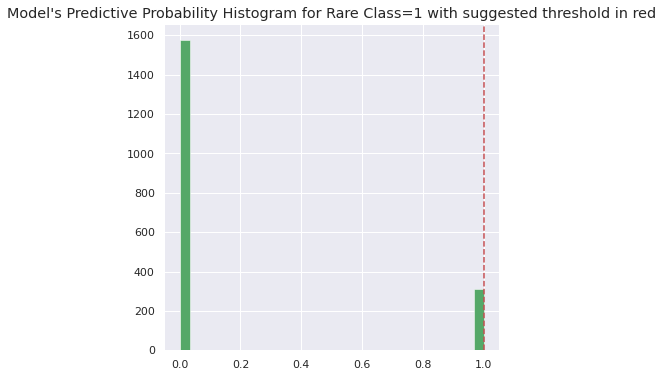

    Using threshold=0.5. However, 1.000 provides better F1=1.00 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 83.6%
Balanced Accuracy = 100.00% with Threshold = 0.50
Confusion Matrix:
[[1578    0]
 [   0  309]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1578
           1       1.00      1.00      1.00       309

    accuracy                           1.00      1887
   macro avg       1.00      1.00      1.00      1887
weighted avg       1.00      1.00      1.00      1887

Balanced Accuracy = 100.00% with Threshold = 1.00
Confusion Matrix:
[[1578    0]
 [   0  309]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1578
           1       1.00      1.00      1.00       309

    accuracy                           1.00      1887
   macro avg       1.00      1.00

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 50.000%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1578
           1       0.00      0.00      0.00       309

    accuracy                           0.84      1887
   macro avg       0.42      0.50      0.46      1887
weighted avg       0.70      0.84      0.76      1887

[[1578    0]
 [ 309    0]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


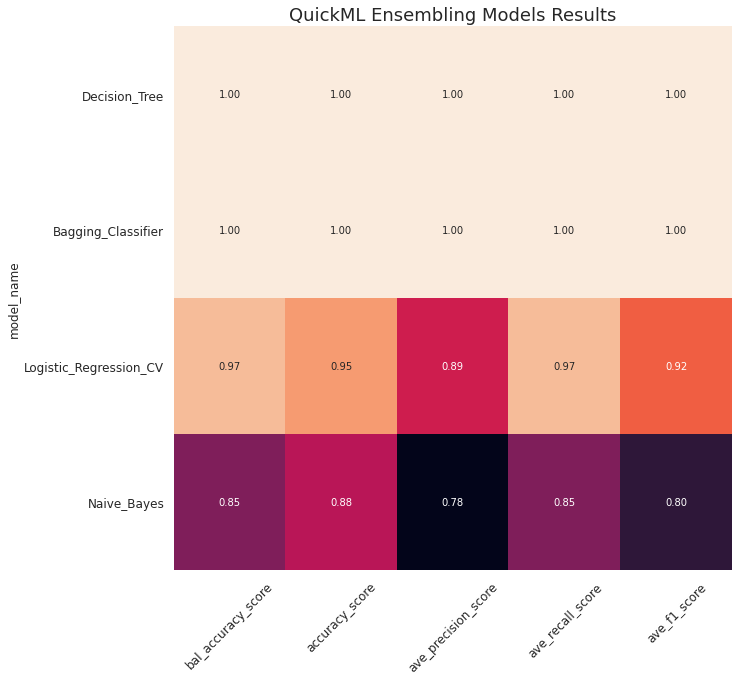

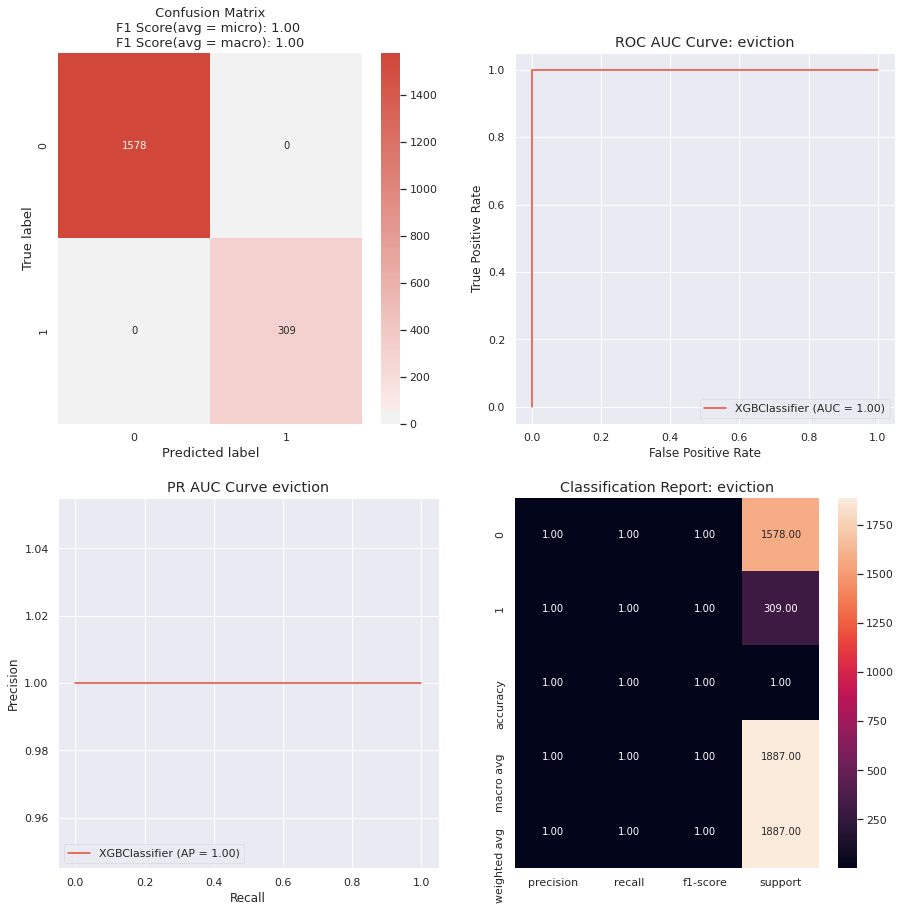

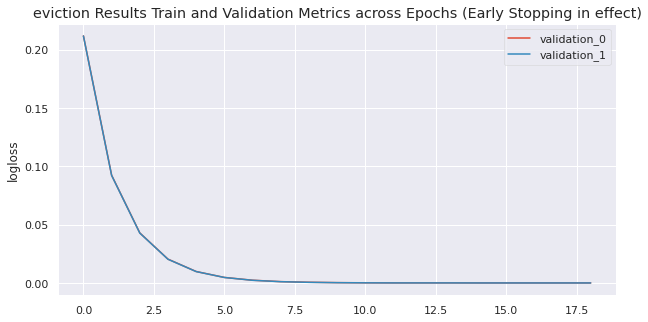

    Time taken for this Target (in seconds) = 111
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
Feature scaling for total 13 float and integer variables completed using MinMaxScaler(copy=True, feature_range=(0, 1))...
##################  Imbalanced Flag Set  ############################
Imbalanced Class Training using SMOTE Rare Class Oversampling method...
    Number of Rare Class samples = 2265
    Number of K Neighbors selected for SMOTE = 10
    Pct of Rare Class in data = 17.15%
This is not an Imbalanced data set. No need to use SMOTE but continuing...
    SMOTE completed. Actual time taken = 0 seconds
##################  Training XGBClassifier on Imbalanced data...  ################
Imbalanced class training completed.
Actual Training time taken in seconds = 2
    Making test Data predictions using modified Threshold = 1.000
    Calculating weighted average ensemble 

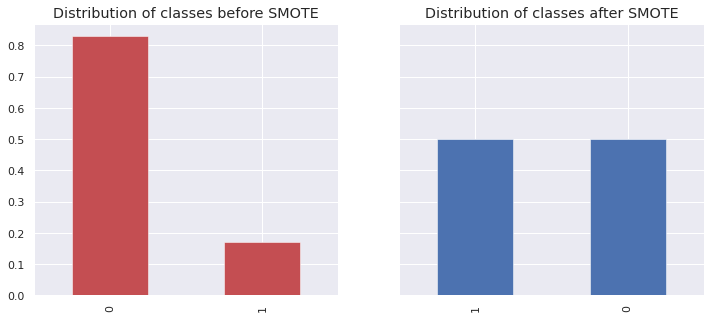

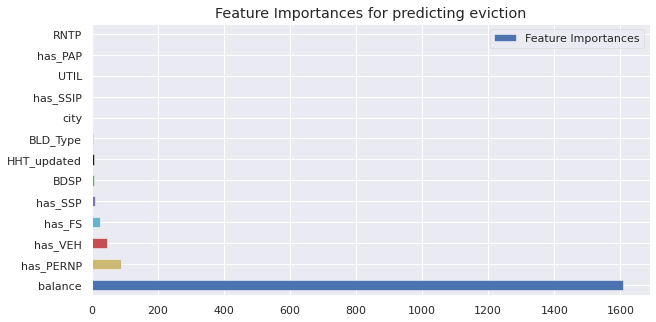

In [ ]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [ ]:
features

['balance',
 'has_PERNP',
 'has_SSP',
 'has_FS',
 'has_VEH',
 'HHT_updated',
 'has_SSIP',
 'RNTP',
 'UTIL',
 'BDSP',
 'BLD_Type',
 'has_PAP',
 'city']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
testm

,balance,has_PERNP,has_SSP,has_FS,has_VEH,HHT_updated,has_SSIP,RNTP,UTIL,BDSP,BLD_Type,has_PAP,city,eviction_predictions,eviction_Logistic_Regression_CV_predictions,eviction_Decision_Tree_predictions,eviction_Naive_Bayes_predictions,eviction_Bagging_Classifier_predictions,eviction_XGBoost_predictions,eviction_proba_0,eviction_proba_1,eviction_Ensembled_predictions
13204,0.13,1.00,0.00,0.00,1.00,0.50,0.00,0.33,0.07,0.29,0.00,0.00,1.00,0,0,0,0,0,0,1.00,0.00,0
13205,0.10,1.00,0.00,0.00,1.00,0.50,0.00,0.23,0.05,0.29,0.00,0.00,0.50,0,0,0,0,0,0,1.00,0.00,0
13206,0.09,1.00,0.00,0.00,0.00,0.50,0.00,0.16,0.10,0.00,0.00,0.00,0.50,0,0,0,0,0,0,1.00,0.00,0
13207,0.15,1.00,0.00,0.00,1.00,0.00,0.00,0.37,0.14,0.43,0.00,0.00,0.50,0,0,0,0,0,0,1.00,0.00,0
13208,0.12,1.00,0.00,1.00,1.00,0.00,0.00,0.43,0.27,0.43,0.00,0.00,0.50,0,0,0,0,0,0,1.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18859,0.05,0.00,1.00,0.00,1.00,0.50,0.00,0.22,0.07,0.29,0.00,0.00,0.50,0,1,1,1,1,0,0.00,1.00,0
18860,0.09,1.00,0.00,0.00,0.00,1.00,0.00,0.32,0.12,0.00,0.00,0.00,0.50,0,0,0,0,0,0,1.00,0.00,0
18861,0.40,1.00,0.00,0.00,1.00,0.50,0.00,0.58,0.09,0.43,0.00,0.00,0.50,0,0,0,0,0,0,1.00,0.00,0
18862,0.11,1.00,0.00,0.00,1.00,1.00,0.00,0.31,0.11,0.29,0.33,0.00,0.50,0,0,0,0,0,0,1.00,0.00,0


In [ ]:
print(confusion_matrix(test_df[target].values,testm['eviction_Bagging_Classifier_predictions'].values))


[[4785    0]
 [   0  875]]


In [ ]:
print(confusion_matrix(test_df[target].values,testm['eviction_Decision_Tree_predictions'].values))


[[4785    0]
 [   0  875]]


In [ ]:
print(classification_report(test_df[target].values,testm['eviction_Decision_Tree_predictions'].values))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4785
           1       1.00      1.00      1.00       875

    accuracy                           1.00      5660
   macro avg       1.00      1.00      1.00      5660
weighted avg       1.00      1.00      1.00      5660



In [ ]:
print(confusion_matrix(test_df[target].values,testm['eviction_Decision_Tree_predictions'].values))


[[4785    0]
 [   0  875]]
